In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = sns.load_dataset("mpg")

X_train, y_train = df[~df["horsepower"].isna()][["displacement", "acceleration"]], df[~df["horsepower"].isna()]["horsepower"]
X_pred = df[df["horsepower"].isna()][["displacement", "acceleration"]]

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_pred)
y_pred = np.round(y_pred)
df.loc[X_pred.index, "horsepower"] = y_pred
df = pd.get_dummies(df.drop("name", axis = 1), columns = ["origin"])
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_europe  origin_japan  origin_usa  
0          70              0             0           1  
1          70              0             0           1  
2          70              0             0           1  
3          70              0             0           1  
4          70              0             0           1

In [3]:
X, y = df.drop(["mpg"], axis = 1).values, df["mpg"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

In [4]:
scaler = StandardScaler()
#scaler = MinMaxScaler()

scaled_X_train = scaler.fit_transform(X_train)
scaled_X_val = scaler.transform(X_val)
scaled_X_test = scaler.transform(X_test)

In [5]:
from evolutionary_algos import VectorizedEvoRegressor

In [6]:
regressor = VectorizedEvoRegressor(n = 100, hidden_layers = [10], activation = "relu", random_state = 42)

regressor.fit(scaled_X_train, y_train, epochs = 100, validation_data = (scaled_X_val, y_val), verbose = 1)

Epoch 0 - loss: 7.883740580987366 - val_loss: 9.117732389946575
Epoch 11 - loss: 6.1178709735622485 - val_loss: 6.75412847453607
Epoch 12 - loss: 5.668901304505985 - val_loss: 5.556312533488099
Epoch 15 - loss: 4.828279742476399 - val_loss: 4.59207625556496
Epoch 17 - loss: 4.339824569022567 - val_loss: 3.941990598558557
Epoch 19 - loss: 3.9645109245618615 - val_loss: 4.351620350676524
Epoch 21 - loss: 3.5880378642213446 - val_loss: 3.4716659163613777
Epoch 22 - loss: 3.585471020903146 - val_loss: 3.287176395101053
Epoch 23 - loss: 3.3948740703495806 - val_loss: 3.4714639930737006
Epoch 24 - loss: 3.08105268434361 - val_loss: 2.9043673480043197
Epoch 25 - loss: 2.7718231472653883 - val_loss: 2.526556989585724
Epoch 30 - loss: 2.658513301416743 - val_loss: 2.1657340890945926
Epoch 32 - loss: 2.641168163730171 - val_loss: 2.2677016244738484
Epoch 33 - loss: 2.6125571122765603 - val_loss: 2.507063962248137
Epoch 36 - loss: 2.5396764849128384 - val_loss: 2.1420208256300155
Epoch 37 - loss:

In [7]:
y_pred = regressor.predict(scaled_X_test)

In [8]:
mean_absolute_error(y_test, y_pred)

1.7483595365494786

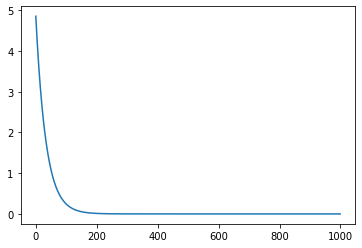

In [9]:
y = []
xrange = 1000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / (10 * math.log10(xrange)))))

plt.plot(list(range(xrange)), y)

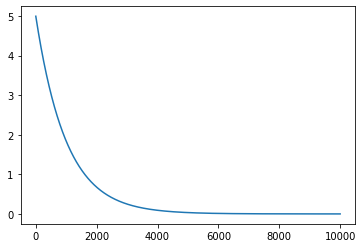

In [10]:
y = []
xrange = 10000

for x in range(1, xrange + 1):
    y.append(5 * 1 / math.exp(x / (xrange / 10)))

plt.plot(list(range(xrange)), y)